# Grundlagen

Wir wissen also bereits, dass Messwerte die gesuchten Informationen über eine physikalische Größe beinhalten. Häufig findet die Übertragung dieser Information in Form eines Messsignals statt. Die Frage ist nun: Was ist denn überhaupt ein *Signal*? Dieser Begriff wird umgangssprachlich häufig mehrdeutig benutzt. In unserem Falle, also im technischen Gebrauch, sprechen wir von einem *Zeitverlauf* einer physikalischen Größe. Damit es eindeutig wird, wollen wir statt des Begriffs *Signal* einfach das Wort *Messsignal* einführen. Das bedeutet, dass ein Signal nicht an eine bestimmte physikalische Größe gebunden ist. Ein Signal besteht nämlich in der Regel aus mehreren Parametern (*Informationsparameter*), die die *Träger* von physikalischen Informationen sein können. Das einfachste Beispiel kann ein Messsignal in Form einer sinusförmigen Spannung sein, z.B.:

$$u(t) = A \cdot \sin(\omega t + \varphi)$$

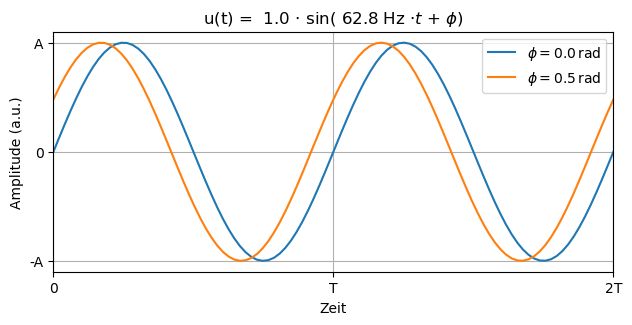

In [5]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße

A = 1.0   # Amplitude
f = 10    # Frequenz in Hz
phi = 0.  # Phase in radian
T = 1/f   # Perdiodendauer
t = np.linspace(0,2*T,100) # Zeitwerte der Sinusfunktion in sec

fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(t,A * np.sin(2*np.pi*f*t + phi), label = r'$\phi = 0.0\,\mathrm{rad}$')
ax.plot(t,A * np.sin(2*np.pi*f*t + 0.5), label = r'$\phi = 0.5\,\mathrm{rad}$')
ax.set_xlabel('Zeit')
ax.set_ylabel('Amplitude (a.u.)')
ax.set_xlim(0,2*T)
ax.set_xticks([0, T, 2*T])
ax.set_xticklabels(['0','T','2T'])
ax.set_yticks([-A, 0, A])
ax.set_yticklabels(['-A','0','A'])
ax.set_title(r'u(t) =%5.1f $\cdot$ sin(%5.1f Hz $\cdot t$ + $\phi$)' %(A, 2*np.pi*f))
ax.grid()
ax.legend()
plt.show()

Die Funktion hängt von drei Parametern ab:
* der Amplitude $A$
* der Frequenz $f$, bzw. Kreisfrequenz $\omega = 2\pi f$
* der Phase (Phasenwinkel) $\phi$

Je nach Aufgabe können wir das Messsignal auswerten indem wir entweder die Amplitude messen, oder die Frequenz, oder den Phasenwinkel (oder alle zusammen). 

Vorteil der Nutzung von Messsignalen ist, das physikalische Größen mittels dieser Umwandlung relativ einfach übertragen und weiterverarbeitet werden können. Dies ist insbesondere für Steuer- oder Regelungsprozesse von besonderem Interesse. 

## Wandlung von physikalischen Größen <a id="SubSec-Wandlung_von_physikalischen_Größen"></a>

Schon bei sehr einfachen Messeinrichtungen erfolgt im Allgemeinen eine Wandlung desaus der Umwelt gewonnen Messsignals in einer für den Menschen interpretierbare, bzw. zur Weiterverarbeitung geeignete Signalform. Ganz wichtig ist hierbei, dass die Messinformation auf gar keinen Fall verändert werden darf. Bzw. wenn die Messinformation verändert werden sollte, dann sollte dies immer kontrolliert und bewusst geschehen, sodass die gewünschte Information immer noch zurück gewonnen werden kann. Dies ist in der Praxis aber wieder nur bedingt möglich. 

Wir können auf jeden Fall folgendes zusammenfassen, wenn wir die Wandlung einer physikalischen Größe betrachten:
* Jede physikalische Größe wird in der Regel in ein Signal umgewandelt, da die wenigsten Größen in der Natur *direkt* messbar sind.
* Selbst elektrische Spannungen müssen irgendwie angezeigt werden können:
    * Die Amplitude könnte beispielsweise über einen Zeigerausschlag transformiert werden. Hierfür kann ein *Elektroskop* benutzt werden, welches über die Spannung, bzw. Spannungsdifferenzen, aufgeladen wird. Gleichnamige Ladungen stoßen sich ab und es wird eine elektrostatische Kraft erzeugt: $F = q\cdot E$, wobei $q$ die Ladung und $E$ die Feldstärke ist. D.h. zunächst einmal kann das Elektroskop Ladungen messen. Da es sich aber wir ein Kondensator verhält (zwei voneinander isolierte Elektroden) können wir mittels $Q = CU$ auch Spannungen messen. $C$ ist hierbei die Kapazität des Kondensators (konstant).
    * Für die Temperatur könnte ein temperaturabhängiger Widerstand beutzt werden, der einen Spannungsabfall erzeugt. 

Für die Wandlung einer Signalform in eine andere sollte folgendes gelten:
* Die physikalische Größe der Informationsparamter darf nicht verändert werden, sie wird lediglich in eine neue Signalform umgewandelt.
* Beispiel: Ein Messverstärker, der eine Amplitude eines Messsignals für die Anzeige vorbereitet, wandelt eine *Amplitude* in eine *Amplitude*.

Zur Informationsübertragung werden häufig **elektromagnetische Wellen** oder **elektrische Signale** benutzt. In einigen Bereichen sind aber auch **mechanische**, **pneumatische** und **hydraulische** Signale üblich, vor allem wenn man sich technische Regeleinrichtungen ansieht, spielen die letztgenannten Signale eine wichtige Rolle. Die nachfolgenden Beschreibungen kann aber auch jede Art von Messsignal angewendet werden.

![Bild](pictures/messsignal_wandlung.png)

## Elektromagnetische Wellen als Informationsträger

**Beispiel** Radiowellen schwingen bis zu 300 Millionen-mal pro Sekunde (= 300 MHz). Je nach Frequenz, bzw. Wellenlänge, werden Radiowellen in Mittel-, Kurz- und Ultrakurzwellen klassifiziert. Deren Ausbreitungsgeschwindigkeit beträgt Lichtgeschwindigkeit (es sind ja elektromagnetische Wellen) und liegt somit bei 299.792.458 m/s (also ca. 300.000km/s). Die Wellenlänge kann mittels folgender Formel aus Freqnenz $f$ und Geschwindigkeit $c$ berechnet werden:

$$ \lambda = \frac{c}{f}$$

Die Wellenlängen von Radiowellen sind somit über 1m lang.

In [3]:
f = 300e6 # Frequenz in Hz
c = 299792458 # Lichtgeschwindigkeit in m/s
wellenlaenge = c/f
print('Die Wellenlänge einer Schwingung mit Frequenz f = %5.2f MHz beträgt %5.2f m' %(f/1e6,wellenlaenge))

Die Wellenlänge einer Schwingung mit Frequenz f = 300.00 MHz beträgt  1.00 m


Da die Wellenlänge sehr groß ist, wird diese Art von Strahlung kaum durch Teilchen in unserer Atmosphäre oder Ionosphäre absorbiert und abgeschwächt, sondern tatsächlich reflektiert. Dadurch eignet sie sich hervorragend für die Signalübertragung von langen Distanzen. Die Ionosphäre agiert quasi als riesengroßer Spiegel für die Radiowelle, wodruch die Strahlung zurück zur Erde reflektiert wird. (Tatächlich wird dank Strahlung aus dem Weltall dafür gesrogt, dass Elektronen aus Atomen in der Ionosphäre gelöst werden. Dadruch bilden sich positiv geladene Atomreste, welche zusammen mit den freien Elektronen einen Spiegel für Radiowellen bilden.)

* Radiowellen mit Frequenzen **unter 30 MHz** können von der Ionosphäre vollständig reflektiert werden. Einige Telekommunikations- und Radarsysteme nutzen die reflektierenden Eigenschaften der Ionosphäre für Radiowellen unterhalb von etwa 30 MHz zur Überbrückung großer Entfernungen.
* Radiowellen mit Frequenzen **oberhalb von 30 MHz** können die Ionosphäre durchdringen, so dass eine Kommunikation mit Satelliten möglich wird.  (Die Radiowellen regen die freien Elektronen zum Schwingen an, wodurch ein Dipolstrahler entsteht. Dieser erzeugt Strahlung mit einer Phasenverschiebung, aber der gleichen Frequenz. Als Resultat sieht es so aus, als würde die einfallende Strahlung von Erde vom Lot webgebrochen werden (Die Ionosphäre ist also ein optisch dünneres Medium. Je steiler der Einfallswinkel (oder je höher die Frequenz), umso tiefer dringt die Radiowelle in die ionisierte Schicht ein. 
* Selbst im **GHz-Bereich** macht sich ein Brechungseinfluss noch störend bemerkbar, wodurch Messfehler bei der Satellitennavigation entstehen.

Die Reichweite von Signale zur Übertragung von Informationen hängt also von der Wellenlänge bzw. Frequenz der Strahlung ab und den Umgebungsparametern (wie z.B. die Ionosphäre). Weitere  elektromagnetische Wellen, welche gerne zur Signaleübertragung benutzt werden, sind z.B.:
* Funkwellen (~1m - ~1km)
* Mikrowellen (~1mm - ~1m)
* Infrarot-Strahlung (~1um - ~1mm)
* UV-Strahlung (~100nm - ~390nm)
* Röntgenstrahlung (~30pm - ~1nm)

Das sichtbare Licht, ebenfalls eine elektromagnetische Welle, ist nur in einem verhältnismäßig kleinem Bereich zu finden.~

Es gilt allgemein, je kleiner die Wellenlänge, desto höher die Frequenz, desto höher ist die Energie, die transportiert wird:

$$E = h \cdot f $$

mit $h = 6.626\cdot 10^{-34}\,\mathrm{Js}$ dem Planck'schen Wirkungsquantum.

![Bild](pictures/EM_spectrum.png)

```{note} Funkwellen in der Ionosphäre
:class: dropdown

**Exkurs: Funkwellen in der Ionosphäre**

Radiowellen unterschiedlicher Frequenz und Einfallswinkel werden an der Ionosphäre reflektiert und auf die Erde zurück geworden, oder durchgelassen, wodruch Satellitenkommunikation ermöglich wird. Ob und wie Funkwellen reflektiert werden, hängt von der Dichte und Höhe der Ionosphärenschicht ab, und von der Frequenz der einfallenden Funkwelle. 

Durch Sonneneinstrahlung im ultravioletten Bereich werden Elektronen in der Ionosphäre von ihren Luftatomen getrennt. Dadurch entstehen freie Elektronen und postiv geladene Ionenrümpfe bleiben zurück. Je stärker die Sonneneinstrahlung (je mehr UV-Lichtteilchen), desto mehr Elektronen frei gesetzt und die Elektronendichte, $N_e$, steigt an. 

* 0-90km: hier gibt es keine freien Elektronen, keine Ionosphäre!
* 50-90km: D_Schicht: keine Bedeutung für unsere Funkwellen (sie existiert auch nur am Tag wenn die Sonneneinstrahlung am stärksten ist
* ~100km: E-Schicht
* ~200km: F1-Schicht
* 250-400km: F2-Schicht: größte Elektronen-/Ionendichte mit etwa $N_e =$ 1 Million/cm$^3$ freie Elektronen
* noch höher: Luftmoleküle werden seltener, wodruch die Elektronendichte trotz stärkerer Strahlung wieder abnimmt 

Ionosphäre ist tagüber, bei maximaler Sonneneinstrahlung, am stärksten mit freien Elektronen versetzt. Nachts nimmt die  Ionosphäre ab, da sich die freien Elektronen wieder mit den Ionen verbinden. Dies dauert je nach Höhe der Schicht unterschiedlich lang. Die F2-Schicht beispielsweise ist auch nachts noch so stark ausgeprägt, dass sie zur Übertragung von Funkwellen benutzt werden kann. 

Wenn Funkwellen in die Ionosphäre eintreten, ändern sie ihre Richtung, ähnlich wie Lichtstrahlen an einem Prisma. Niederigere Frequenzen brechen sich hierbei leichter, also hohe Frequenzen. Schräge Wellen berechen sich leichter als senkrecht eintreffende Strahlen. 

Das Verhalten von Funkwellen beim Auftreffen auf freie Elektronen kann mittels Plasmatheorie beschrieben werden. In einem Plasma treten lokal verdichtete Bereiche von freien Elektronen auf. Das sogenannten Elektronengas. An diesen Stellen ist die Dichte der Elektronen so hoch, dass die Coulombkraft abstoßend zwischen den Elektronen in Vorschein tritt. Dadurch werden die Elektronen wieder auseinander getrieben. Aufgrund der Trägheit der Elektronen treten hierdurch allerdings an anderen Stellen wieder lokale Verdichtungen auf und der Effekt wiederholt sich. Dieses Hin und Her von lokalen Ladungsüberschussen resultiert in eine periodische Schwingung, die sogenannte Plasmafrequenz, mit der die Elektronendichte um ihre mittlere Dichte oszilliert:

$$f_p = \frac{1}{2\pi}\sqrt{\frac{N_e e^2}{\epsilon_e m_e}} \approx 8,978\,\mathrm{Hz} \cdot \sqrt{\frac{N_e}{\mathrm{m^3}}}$$

Hier ist $\epsilon_0 = 8,854\cdot 10^{-12}\,\mathrm{\frac{As}{Vm}}$ die elektrische Feldkonstante, $N_e$ die Elektronendichte, $m_e$ die Elektronenmasse, $e = 1,602\cdot 10^{-19}\,\mathrm{C}$ die Elementarladung. Abhängig von der Höhe haben wir in der Ionosphäre unterschiedliche Elektronendichten und können folgende Plasmafrequenzen berechnen:
* 100km Höhe: $f_p = 1,5\,\mathrm{MHz}$
* 800km Höhe: $f_p = 7\,\mathrm{MHz}$

Der Brechungsindex $n$ der Ionosphäre lässt sich mittels folgender Formel berechnen: 

$$n = \sqrt{1- \frac{f_p^2}{f^2}}$$

Hierbei wurde die Zyklotronfrequenz der Elektronen, die durch das Magnetfeld der Erde  hervorgerufen wird, vernachlässigt. Unter Berücksichtung der Kreisbewegung der Elektronen um die Feldlinien im Erdmagnetfeld würde ansonsten ein zusätzlicher Frequenzterm von etwa 1,3MHz zu der Gleichung hinzugefügt werden und je nach Polrisation der einfallenden Funkwelle (links-zirkular oder recht-zirkular) würden sich leicht unterschiedliche Brechungsindizies ergeben, abhängig davon, ob die Drehrichtung mit der Elektronenbewegung übereinstimmt.

Anhang dieser Formel sind zwei Fälle zu berücksichtigen:

* $f < f_p$: der Brechungsindex wird imaginär. D.h. es findet vollständige Reflektion statt und Lang- und Mittelwellen kommen wieder zurück zur Erden
* $f > f_p$: der Brechungsindex ist real. D.h. die Funkwellen können die Schicht durchdringen (bei senkrechtem Einfall der Strahlung)

Das bedeutet für unsere beiden Fälle von oben, dass unter senkrechtem Einfall:
* in 100km Höhe Funkwellen mit einer Frequenz von <1,5MHz vollständig reflektiert werden. Wellen höherer Frequenz können diese Ionosphärenschicht durchdringen.
* in 800km Höhe Funkwellen mit einer Frequenz von <7,0MHz vollständig reflektiert werden. Wellen höherer Frequenz können diese Ionosphärenschicht durchdringen. 
* Funkwellen mit Frequenzen >7MHz werden die Erde nicht wieder erreichen.

Die Plasmafrequenz ist in dieser Annäherung also die kritische Frequenz, bis zu welcher Funkwellen unter einem senkrechtem Einfallswinkel, vollständig reflektiert werden. 

Desweiteren wird beobachtet, dass die Durchlässigkeit der Ionosphäre für Funkwellen vom Eintreffwinkel abhängt und näherungsweise über folgende Formel beschrieben werden kann:

$$f_\mathrm{MUF} \approx \frac{f_\mathrm{krit}}{\sin(\alpha)} = f_\mathrm{krit} \cdot \sqrt{1 + \left(\frac{d}{2 h_\mathrm{krit}}\right)^2}$$

wobei $\alpha$ der Winkel ist, der die Strahlung zum Horizont bildet, $f_\mathrm{krit}$ die kritische Frequenz ist, unter welcher die Strahlung vollständig reflektiert werden würde, $d$ ist die Entfernung zwischen Sender und Empfänger und $h_\mathrm{krit}$ die virtuelle Höhe der Reflektion. Hier ist $f_\mathrm{MUF}$ die **Grenzfrequenz** der Funkwelle, welche gerade noch von der Schicht reflektiert wird. MUF steht hierbei für *maximum usable frequency*. Analog gibt es auch die LUF-Frequenz, die *lowest usable frequency*. 

```

## Wo steckt die Information? <a id="SubSec-Information"></a>

Im ersten Abschnitt haben wir schon angedeutet, dass nicht nur physikalische Größen in Messsignale umgewandelt werden, sondern auch Signale in andere Signalformen. Sehr häufiges Beispiel aus der Messtechnik ist der Informationsparameter Amplitude der in Frequenz umgewandelt wird. Dies hat den einfachen Grund, dass die Frequenz eines Messsignals extrem unempfindlich gegenüber Störeinflüssen aus der Umgebung ist. Eine Amplitude wird viel schneller verfälscht, oder abgeschwächt, als die Frequenz. Ein weiterer Vorteil ist, dass die Frequenz eines Messsignals sehr einfach digitalisiert werden kann, wodurch auch die physikalische Größe schnell digital zur Verfügung steht. Man könnte beispielsweise eine einfache Triggereinrichtung nutzen, welche die Frequenz eines Messsignals in Pulse umwandelt, die mit einer bestimmten Wiederholrate (also mit der Frequenz des Signals) zur Verfügung gestellt werden. Diese Pulse werden dann innerhalb eines definierten Zeitfenster ausgezählt. Mit solchen *Frequenzzählern* werden wir uns später noch ausführlicher beschäftigen. Für solch eine Art von Messsignal wird eine **Modulation** des Messsignals benötigt, welche die physikalische Größe auf den Träger, in diesem Fall die Frequenz, aufbringt. 

Klassischerweise benutzt man eine sinusförmige Schwingung konstanter Frequent und Amplitude als **Trägerschwingung**. Durch die Modulation können folgende Parameter der Trägerschwingung beeinflusst werden:
* die Amplitude. Dies ist bekannt als Amplitudenmodulation (AM)
* die Frequenz. Dies ist bekannt als Frequenzmodulation (FM)
* die Phase. Hierbei wird der Nullphasenwinkel verschoben. Dies ist bekannt als Phasenmodulation (PM)

Im Anschluss muss mittels **Demodulation** der originale Zeitverlauf der physikalischen Größe zurückgewonnen werden. 

**Nutzsignale** wie Sprache oder Musik können häufig nicht direkt über gewünschte Übertragungsmedien wie beispielsweise einen Funkkanal übertragen werden. Hierfür wird ein Trägersignal benötigt, mittels welchem das Nutzsignal übertragen werden kann.
Wir nehmen ein sinuförmiges Nutzsignal (*message*) an:

$$m(t) = A_\mathrm{m} \cdot \sin(2\pi f_\mathrm{m} t)$$

mit der Amplitude $A_\mathrm{m}$ and Frequenz $f_\mathrm{m} = 100\,\mathrm{Hz}$. Außerdem widmen wir uns zunächst einem *sinusförmigen* Trägersignal (*carrier*)

$$s(t) = A_c \cdot \sin(2\pi f_c t + p_0)$$

mit der Amplitude $A_c$ und der Trägerfrequenz $f_c = 1\,\mathrm{kHz}$. $p_{0}$ ist eine Konstante, die Phase zum Zeitpunkt $t=0$.
Beide Signale sind den folgenden Diagrammen für $f_\mathrm{m} = 100\,\mathrm{Hz}$ und $f_c = 1\,\mathrm{kHz}$ dargestellt: 

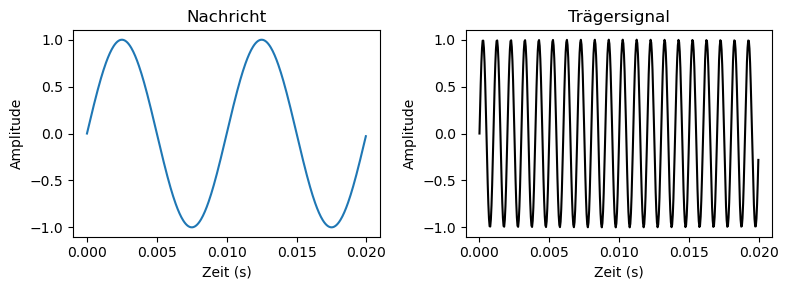

In [196]:
from scipy.fft import rfft, rfftfreq
from scipy.io.wavfile import read #import the required function from the module
import matplotlib.pyplot as plt
import numpy as np
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(8,3)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

samplerate, data = read('CantinaBand3.wav')
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector

Fs = 22050.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,0.02,Ts) # time vector
ff = 1000;   # frequency of the carrier
f_m = 100
maxN = int(Fs/2)
# Sinusschwingung
f = lambda freq, ampl, t:  ampl*np.sin(2*np.pi*freq*t)
y = f(ff,1.0,t)
y_nutz = f(f_m,1.0,t)

data_norm = data/np.max(data)
y_nutz_norm = y_nutz/np.max(y_nutz)
plt.subplot(1,2,1)
#plt.plot(time, data_norm, 'tab:blue')
plt.plot(t, y_nutz_norm, 'tab:blue')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.title('Nachricht')
#plt.xlim([0.0,0.3])
#plt.ylim([-0.4,0.4])

plt.subplot(1,2,2)
plt.plot(t, y, 'k')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.title('Trägersignal')
#plt.xlim([0.0,0.3])

plt.tight_layout()
plt.show()

## Amplitudenmodulation

Zur Übertragung muss das Nutzsignal in einen anderen Frequenzbereich verschoben werden, was beispielsweise durch eine **Amplitudenmodulation (AM)** geschehen kann. Durch das Verschieben können auch mehrere Nutzsignale gleichzeitig und ohne gegenseitige Störung übertragen werden.

$$y_\mathrm{AM}(t) = \left[A_c + m(t)\right] \cdot \sin(2\pi  f_c  t)$$

$m(t)$ die modulierende Funktion oder kurz der Modulator. Hier wäre es entsprechend die Nachricht, die auf das Trägersignal moduliert wird. 

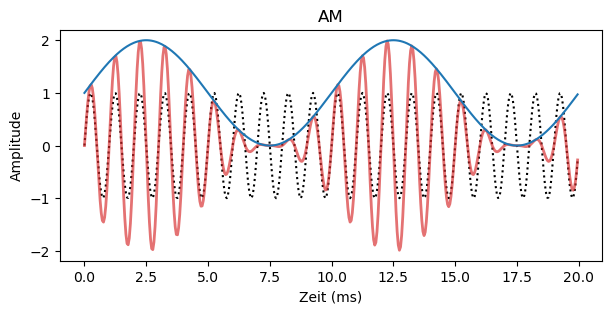

In [197]:
plt.figure(figsize=(7,3)) # Plot-Größe
A = 1.0
AM = (A+y_nutz_norm)*f(ff,1.0,t)
plt.plot(t*1000, y, 'k', ls=':', label = 'Träger')
plt.plot(t*1000,AM, 'tab:red', lw=2, alpha = 0.65, label = 'AM')
plt.plot(t*1000, y_nutz_norm+A, 'tab:blue', label = 'Nachricht')
plt.title('AM')
#plt.xlim([0.276,0.285])
#plt.ylim([-1.5,1.5])
plt.xlabel('Zeit (ms)')
plt.ylabel('Amplitude')
plt.show()

## Phasenmodulation 

Frequenzmodulation und Phasenmodulation hängen mathematisch eng zusammen. Eine Phasenmodulation eines sinusförmigen Trägers kann man sehr einfach ausdrücken. Zunächst der unmodulierte Träger:

$$ s(t) = A_c \cdot \sin(2\pi f_c t + p_0)$$

Wir können die momentane Phase als Funktion der Zeit schreiben: 

$$ p(t)=(\omega_{c}t+p_{0}) $$

mit der Kreisfrequenz $\omega_c = 2 \pi f_c$.

Nun wird die momentane Phase durch Addition eines Modulators verändert, dadurch entsteht der Ausdruck für eine Phasenmodulation:

$$ y_\mathrm{PM}(t)= A_c \sin\left(2\pi f_c t  +p_0 + M_p m(t)\right)$$

Dabei ist $M_{p}$ die Modulationsstärke und $m(t)$ die modulierende Funktion oder kurz der Modulator, hier die entsprechende Nachricht, $y_\mathrm{Nachricht}(t)$. Entsprechend:

$$ p(t)=2\pi f_c t+p_{0}+M_{p}m(t)$$

Man sieht, dass eine Phasenmodulation mathematisch sehr einfach auszudrücken ist.

## Frequenzmodulation

Vom heutigen Stand der Technik betrachtet ist die AM allerdings überholt, weil die Qualitätsansprüche gestiegen sind und mit modernen Bauelementen die **Frequenzmodulation (FM)** erheblich einfacher, billiger und leistungssparender gebaut werden können. Außerdem haben die FM einen höheren Dynamikumfang des Informationssignals und ist weniger anfällig gegenüber Störungen. Eine Frequenzmodulation setzt voraus, dass sich die Frequenz ständig ändert. Dieses lässt sich nicht mehr durch einen Term der Form $\omega_c t = 2\pi f_c t$ ausdrücken, sondern wir müssen den Begriff der momentanen Kreisfrequenz einführen:

$$\omega(t) = \frac{d}{dt}p(t)$$

wobei die $p(t)$ eine sich verändernde Phase ist. Die **momentane Frequenz** ist also ganz allgemein die zeitliche Ableitung der Phasenfunktion (vgl. in diesem Zusammenhang die Beziehung zwischen Geschwindigkeit und Ort und die Analogie zwischen Phase und Ort bzw. Frequenz und Geschwindigkeit). Eine Frequenzmodulation fordert nun, dass sich die momentane Frequenz verändert:

$$\omega (t)=\omega_c+M_{f} m(t)$$ 

wobei $M_f$ wieder die Modulationstärke ist und $m(t)$ die modulierende Funktion, bzw. *message*.

Für die Berechnung der Kurvenform zu jedem Zeitpunkt benötigen wir jedoch nicht die momentane Frequenz, sondern die Phasenfunktion. Wenn die Frequenz die Ableitung der Phase ist, so ist umgekehrt die Phase das Integral der Frequenz:

$$ p(t)=\int \omega (t)\,\mathrm {d} t $$

Setzen wir nun die Gleichung für momentane Frequenz ein, erhalten wir folglich:

$$ p(t)=\int \omega_c+M_{f} m(t)\,\mathrm {d} t = \omega_c t + p_0 + M_{f} \int  m(t)\,\mathrm {d} t$$

Damit erhält man für die Frequenzmodulation folgenden Ausdruck:

$$y_\mathrm{FM}(t) = A_c \cdot \sin\left(2\pi f_c t + p_0 + M_f\int m(t) dt \right)$$

Die Frequenzänderung ist durch die Amplitude des Nachrichtensignals gegeben. Angenommen $m(t)$ ist die einheitsnormierte Nachricht und $f_{dev}$ ist die maximal mögliche Abweichung von der Trägerfrequenz $f_c$. 

## Vergleich zwischen PM und FM

Wir setzen als Beispiel das oben eingeführte sinusförmige Nachrichtensignal, $m(t) = A_{m} \cdot \sin(2\pi f_\mathrm{m} t)$, mit $A_m=1$ und $A_c=1$ in die PM und FM Formeln ein:

$$ y_\mathrm{PM}(t) = \sin\left(2\pi f_c t  +p_0 + M_p \sin[2\pi f_m t]\right)$$

$$y_\mathrm{FM}(t) = \sin\left(2\pi f_c t + p_0 - \frac{M_f}{2\pi f_m}\cos[2\pi f_m t] \right)$$

Folgende Eigenschaften können beobachtet werden:
* Der Phasenhub für die Phasenmodulation ist immer noch $M_{p}$
* Der Phasenschub für die Frequenzmodulation ist ${\frac {M_{f}}{\omega_m}}$. 
* Die momentane Frequenz für die Phasenmodulation ist $\omega_c+M_{p}\omega_m\cos(\omega_m t+p_{m})$
* Der Phasenschub für die Frequenzmodulation ist $\omega_c+M_{f} \sin \left(\omega _{m}t+p_{m}\right)$

In beiden Fällen findet eine Modulation der Phase statt. Allerdings wirkt bei der Frequenzmodulation nicht der Modulator direkt auf die Phase ein, sondern es ist erst das Integral des Modulators zu rechnen. Das Integral hat eine Tiefpasswirkung. Der Phasenhub wird also bei der Frequenzmodulation mit zunehmender Frequenz des Modulators geringer. Umgekehrt wird der Frequenzhub bei der Phasenmodulation mit niedriger werdender Modulatorfrequenz immer geringer.

In [ ]:
plt.figure(figsize=(8,3)) # Plot-Größe
A = 1.0
M_p = 4.0
PM = A * np.sin(2*np.pi*ff*t + M_p*y_nutz_norm)
plt.subplot(1,2,1)
plt.plot(t, y, 'k', ls=':', label = 'Träger')
plt.plot(t,PM, 'tab:red', lw=2, alpha = 0.65, label = 'AM')
plt.plot(t, y_nutz_norm, 'tab:blue', label = 'Nachricht')
plt.title('PM')
#plt.xlim([0.276,0.285])
#plt.ylim([-1.5,1.5])
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')

# FM
M_f = 1.0
FM = A * np.sin(2*np.pi*ff*t + M_f*(np.cumsum(y_nutz_norm)))
plt.subplot(1,2,2)
plt.plot(t, y, 'k', ls=':', label = 'Träger')
plt.plot(t,FM, 'tab:red', lw=2, alpha = 0.65, label = 'FM')
plt.plot(t, y_nutz_norm, 'tab:blue', label = 'Nachricht')
plt.title('FM')
#plt.xlim([0.276,0.285])
#plt.ylim([-1.5,1.5])
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Puls-Modulation

Häufig werden auch Rechteckpulsfolgen als Trägerschwingung verwendet. Ähnlich wie bei der Sinusschwingung können auch hier verschiedene Modulationen vorgenommen werden, die größtenteils selbsterklärend sind (wie Pulsamplitudenmodulation oder Pulsdauermodulation). Nur die Pulscode-Modulation ist etwas anders und besonders. Hierbei wird das Messsignal kodiert und besteht aus einer Folge von Pulsgruppen. Diese Aneinanderreihung von Pulsgruppen entspricht einem bestimmten Alphabet. Vorteil dieser Variante ist, dass nur noch zwei Zustände, nämlich 0 und 1, in einer bestimmten Reihenfolge verarbeitet werden müssen. D.h. diese Art von Signalen ist direkt im Computer weiterverarbeitbar, ohne vorangegangen Analog-Digital-Wandlung. 

Auch hier gilt natürlich, dass eine entsprechende Demodulation nachgeschaltet werden muss, um das eigentliche Signal zurück zu gewinnen. 

![Bild](pictures/puls_mod.png)



## Klassifizierung von Messsignalen <a id="SubSec-Klassifizierung_von_Messsignalen"></a>

Für eine ausreichende Charakterisierung von Messsignalen werden diese noch nach dem Wertevorrat der Informationsparameter (analog oder diskret) und dem zeitlichen Auftreten (kontinuierlich oder diskontinuierlich/diskret) unterschieden. Oft kommt dazu noch eine weitere Signalart, nämlich *stochastische* Signale, auch bekannt als *Rauschen*, bei welchem die Werte zufallsbehaftet sind. In diesem Fall können erst bei einer großen Anzahl von Ereignissen gesicherte Aussagen über die Qualität einer Messung geliefert werden (damit haben wir uns ja schon innerhalb der Messunsicherheiten und der Statistik befasst). 
Determinierte Signale liefern hingegen zu jedem Zeitpunkt einen festen Zusammenhang zwischen zu analysierenden und den erhaltenene Messwerten. Allgemein finden wir in technischen Messsystemen eigentlich immer deterministische Signale. Das heißt es gilt Determiniertheit.

Das folgende Bild zeigt, wie der Wertevorrat und deren zeitliche Verfügbarkeit aussehen könnte. Hierbei können kontinuierliche und diskrete sowohl im Wertebereich, also auch im Zeitbereich, kombiniert werden.

![Bild](pictures/messsignal_analog_diskret.png)

Folgende Klassifizierungen von Messsignalen existieren:
* **analog**: Der Wertebereich (also die Werte auf der y-Achse) ist kontinuierlich. Theoretisch kann der Informationsparameter $y$ jeden beliebigen Wert innerhalb seines Wertebereichs annehmen. Dadurch erhält man eine proportional Abbildung zwischen Messsignal und Parameter. Allerdings ist dieses System sehr störanfällig und reagiert auf Störsignale, Rauschen oder Temperaturdrifts. 
* **diskret (wertdiskret)**: Diskret kann man sowohl der Werte- als auch den Zeitbereich bezeichnen. Für die Eindeutigkeit können wir den Begriff wertdiskret benutzen. Hierbei kann der Informationsparameter nur endlich viele Werte annehmen und wird nicht mehr vollständig proportional abgebildet. Dadurch ist das System zwar etwas weniger empfindlich gegenüber Störeinflüssen (erst nach Überschreiten von Grenzwerten wird der nächste *diskrete* Messwert angezeigt), doch bei der Abbildung analoger Messwerte auf einen diskreten Informationsparameter gehen Informationen verloren. 
* **kontinuierlich**: Dies ist das Analogon auf der Zeitachse zum *analogen* Wertebereich. Kontinuierliche Messwerte bedeutet, dass die Informationparameter zu jedem beliebigen *Zeitpunkt* seinen Wert ändern kann. D.h. der zeitliche Verlauf ist immer verfolgbar, jedoch können auch hier Störungen einwirken, und zwar jederzeit, die die Messung beeinflussen. Außerdem wird die Datenmenge oft unnötig groß.
* **diskontinuierlich (zeitdiskret)**: Nun befassen wir uns mit diskreten Messwerten im Zeitbereich. Dies nennt zur Unterscheidung auch diskontinuierlich. Hierbei stehen Informationsparameter nur zu bestimmten Zeitpunkten zur Verfügung, wodurch Störungen, die zwischen zwei Zeitpunkten wirken, keine Rolle mehr spielen. Nachteil ist jedoch, dass die Informationen nur noch zu bestimmten Zeitpunkten zur Verfügung stehen.
* **stochastisch**: Jetzt steckt der Informationsparameter in einer stochastischen Größe, also im Rauschen. Da Störungen häufig eine charakteristische Verteilung haben, sind diese, wenn überhaupt, nur stark reduziert bemerkbar. Sie werden quasi über die Messzeit hinweg mitgemessen, integrieren sich auf, und können weggemittelt werden (Mittelwert ist häufig bei Null). Nachteil dieses Verfahrens ist, dass die Information erst nach mehrmaligen Messungen zur Verfügung steht, was einen großen Zeitbereich benötigen kann.
* **determiniert**: Im Unterschied zu stochastischen Signalen kann hier die Information mit nur einer einmaligen Messung gewonnen werden. Nachteil ist, dass diese einmalige Messung durch Störungen unbrauchbar gemacht werden können. 

Bei *digitalen* Signalen sind die diskreten Werte einem bestimmten Alphabet zugeordnet. Im *binären* System kann der Informationsparameter dann nur noch zwei Werte annehmen. 

Beispiele zum obigen Bild sind:
* **analog kontinuierlich**: Manometer am Druckkessel, Aufgesetzte Messuhr (Wärmeausdehnung), Analoge Spannungs- oder Strommessung
* **analog zeitdiskret**: Abgetastetes System. Informationen gehen verloren.
* **wertdiskret und kontinuierlich**: Lagerbestand (Es können nur ganze Bauelemente dem Lager entnommen werden, sodass der Lagerbestand wertediskret ist. Es ist aber zu jedem Zeitpunkt bekannt, wie viele Bauelemente eines bestimmten Typs vorhanden sind. Das Signal ist zeitkontinuierlich.)
* **wertdiskret und zeitdiskret**: Digitalisierung

Nur bei analogen kontinuierlichen Signalen sind informationsverlustfreie Signalübertragungen möglich. 